In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
raw_data=pd.read_csv("data_cleaned.csv")

In [3]:
print(raw_data.head(2))


   Unnamed: 0  id  year  age  tenure  hourly_wage  male  female  \
0           0   1  1979   20      41        328.0     0       1   
1           2   1  1981   22     162        361.0     0       1   

   country_birth_US  age_45+        ...         industry_public_service  \
0              True      0.0        ...                           False   
1              True      0.0        ...                           False   

   industry_trade  industry_finance  industry_tech_service  \
0           False             False                  False   
1           False             False                  False   

   industry_entertainment  industry_education  industry_healthcare  \
0                   False               False                False   
1                   False               False                False   

   industry_other_service  industry_admin_military  industry_unknown  
0                   False                    False              True  
1                   False       

In [4]:
raw_data.columns

Index(['Unnamed: 0', 'id', 'year', 'age', 'tenure', 'hourly_wage', 'male',
       'female', 'country_birth_US', 'age_45+', 'age_30-45', 'age_30-',
       'race_hispanic', 'race_black', 'race_others', 'region_northeast',
       'region_northcentral', 'region_south', 'region_west', 'region_unknown',
       'marital_never', 'marital_spouse_present', 'marital_others',
       'edu_highschool-', 'edu_highschool', 'edu_undergraduate',
       'edu_undergraduate+', 'edu_unknown', 'employment_employed',
       'employment_unemployed', 'employment_out_laborforce',
       'employment_active', 'employment_unknown', 'tenure_3m', 'tenure_2y',
       'tenure_5y', 'tenure_10y', 'tenure_10y+', 'tenure_unknown', 'jobs_2-',
       'jobs_5', 'jobs_10', 'jobs_10+', 'jobs_unknown', 'occupation_tech',
       'occupation_sales', 'occupation_social_science',
       'occupation_manufacture_worker', 'occupation_military',
       'occupation_farmer', 'occupation_service', 'occupation_management',
       'occupatio

In [5]:
raw_data.dtypes

Unnamed: 0                         int64
id                                 int64
year                               int64
age                                int64
tenure                             int64
hourly_wage                      float64
male                               int64
female                             int64
country_birth_US                    bool
age_45+                          float64
age_30-45                        float64
age_30-                          float64
race_hispanic                      int64
race_black                         int64
race_others                      float64
region_northeast                    bool
region_northcentral                 bool
region_south                        bool
region_west                         bool
region_unknown                      bool
marital_never                       bool
marital_spouse_present              bool
marital_others                      bool
edu_highschool-                     bool
edu_highschool  

In [6]:
raw_data.describe()

,Unnamed: 0,id,year,age,tenure,hourly_wage,male,female,age_45+,age_30-45,age_30-,race_hispanic,race_black,race_others
count,191220.000000,191220.000000,191220.000000,191220.000000,191220.000000,1.912200e+05,191220.000000,191220.000000,191220.000000,191220.000000,191220.000000,191220.000000,191220.000000,191220.000000
mean,145069.041491,5580.125479,1992.515846,31.219166,179.122220,1.424549e+03,0.517320,0.482680,0.138192,0.337208,0.524600,0.174323,0.260966,0.564711
std,89893.944969,3457.480390,9.716317,9.833302,315.547946,2.675170e+04,0.499701,0.499701,0.345102,0.472758,0.499396,0.379388,0.439163,0.495796
min,0.000000,1.000000,1979.000000,14.000000,-4.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68632.750000,2640.000000,1985.000000,23.000000,5.000000,4.750000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136856.500000,5264.000000,1990.000000,29.000000,13.000000,8.000000e+02,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,217068.250000,8349.000000,2000.000000,38.000000,195.000000,1.350000e+03,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,329824.000000,12686.000000,2014.000000,57.000000,2019.000000,6.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#raw_data.fillna(-4, inplace=True)

In [7]:
raw_data.count()

Unnamed: 0                       191220
id                               191220
year                             191220
age                              191220
tenure                           191220
hourly_wage                      191220
male                             191220
female                           191220
country_birth_US                 191220
age_45+                          191220
age_30-45                        191220
age_30-                          191220
race_hispanic                    191220
race_black                       191220
race_others                      191220
region_northeast                 191220
region_northcentral              191220
region_south                     191220
region_west                      191220
region_unknown                   191220
marital_never                    191220
marital_spouse_present           191220
marital_others                   191220
edu_highschool-                  191220
edu_highschool                   191220


In [ ]:
# group by decades


In [14]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(raw_data)
kmeans.cluster_centers_

array([[ 6.34348903e+03,  1.99361533e+03,  1.49527188e+00,
         1.06849789e+00,  3.25133294e+01,  2.43418376e+00,
         7.27381873e-01,  1.16282384e-01,  7.80869526e+00,
        -7.63775827e-01,  3.12822169e+00,  1.08037394e+02,
         1.03477163e+01,  6.29317905e+05,  8.16419322e+02,
         5.97409762e+02,  7.72463144e+02,  8.17412039e+00],
       [ 9.96300000e+03,  2.01000000e+03,  1.00000000e+00,
         2.00000000e+00,  5.00000000e+01,  1.00000000e+00,
         4.00000000e+00,  2.00000000e+00,  9.00000000e+00,
        -4.00000000e+00,  7.00000000e+00,  2.29000000e+02,
         7.00000000e+00,  8.00000000e+09,  2.56410200e+06,
         4.30000000e+02,  3.98000000e+03,  1.10000000e+01]])

## Linear regression

In [65]:
# Assign X (data) and y (target)
X=raw_data[['id', 'year', 'country_birth', 'age', 'race', 'region',
       'marital_status', 'highest_grade', 'employment_status',
       'tenure', 'total_jobs', 'pay_rate', 'hourly_wage', 'occupation_main',
       'industry']]
#y= raw_data["gender"].values.reshape(-1, 1)
y= raw_data["gender"]

In [66]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:


# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# transform trainning and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
# Fit a linear regression model 
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

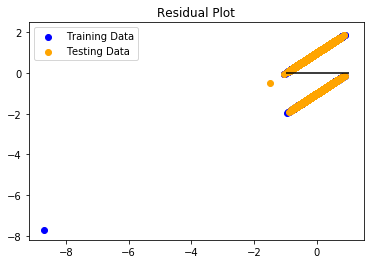

In [12]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [13]:
# how good is the model?


MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9704173625856398, R2: 0.029643489405816847


## LASSO model

In [14]:

# Note: Use an alpha of .01 when creating the model for this activity
### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9735230573654513, R2: 0.026537989374903592


## Logistic regression

In [24]:
y= raw_data["gender"]
print(y.shape)

(329836,)


In [15]:
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
# Fit the model to the data
classifier.fit(X_train, y_train)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# Print the r2 score for the test data
classifier.score(X_test,y_test)

0.558871681684231

In [18]:
confidence= classifier.decision_function(X_test)
# Make predictions using the X_test and y_test data
# Print at least 10 predictions vs their actual labels
predictions = classifier.predict(X_test)

In [67]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "Confidence score": confidence })

,Prediction,Actual,Confidence score
10859,2,2,0.350688
56188,2,2,0.145812
44711,2,2,0.159423
292676,1,1,-0.095121
327674,1,1,-0.130744
198271,1,2,-0.241391
241765,1,1,-0.393762
294250,1,1,-0.098364
212794,1,1,-0.014518
299669,1,1,-0.162899
